## Wine Data Visualization and Initial Analysis

In [1]:
import numpy as np
import pandas as pd

In [2]:
original_df = pd.read_csv("wine_150k.csv", usecols = ['country', 'points', 'price', 'region_1', 'variety', 'winery'], \
                          dtype = {'points': np.int16, 'price': np.float32})

We need to remove NA, but keep as many data with valuable features as possible. Particularly, we want to keep numerical features.

In [3]:
# drop observations with any NA for features in subset
df = original_df.dropna(how = 'any', subset = ['points', 'price', 'region_1'])

In [4]:
# add count feature for each observation
df = df.assign(countbyCountry = df.country.map(df.groupby('country').size()))

In [5]:
df = df[(df.countbyCountry > 500) & (df.price < 500)]

In [6]:
df.describe()

,points,price,countbyCountry
count,114125.000000,114125.000000,114125.000000
mean,87.849376,34.202209,39744.965853
std,3.280359,31.458416,24541.289740
min,80.000000,4.000000,4894.000000
25%,86.000000,17.000000,14775.000000
50%,88.000000,25.000000,62003.000000
75%,90.000000,40.000000,62003.000000
max,100.000000,495.000000,62003.000000


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

We want to see the relationship of the rating of wine to price by each country. Use Seaborn `lmplot` function we can achieve that.

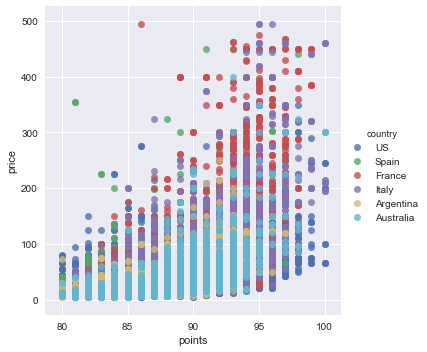

In [8]:
sns.lmplot(x = 'points', y = 'price', data = df, hue = 'country', fit_reg= False)

**Observations**
* The graph only displays wines of prices less than 500 from countries with sample size of at least 500.
* The cheaper wines are mostly from US, Italy, Argentina, and Australia. There is significant overlap though.
* Note that most of the wines with price above 250 are from France and Italy.

Next we want to show distribution of price and points for the most popular wine varieties in each country.
Note that plotting all varieties is not practical nor helpful for analysis. 

In [9]:
variety = df.groupby(['country', 'variety'])
df_c_v = variety.agg({'price': np.mean, 'points': np.mean})
df_c_v = df_c_v.assign(numType = variety.size())

In [10]:
df_c_v = df_c_v.reset_index()

In [11]:
# Choose a threshold for the minimum of types of wine for each (country, variety) to keep.
df_c_v.describe()

,price,points,numType
count,771.000000,771.000000,771.000000
mean,27.264383,87.091528,148.022049
std,19.350653,2.352057,692.380941
min,5.000000,80.000000,1.000000
25%,16.059441,85.781746,2.000000
50%,22.435898,87.000000,8.000000
75%,31.288924,88.500000,39.500000
max,230.000000,96.000000,10265.000000


In [12]:
df_c_v_reduced = df_c_v[df_c_v['numType'] > 100]
df_c_v_reduced.describe()

,price,points,numType
count,120.000000,120.000000,120.000000
mean,29.471888,87.475514,875.533333
std,15.022742,1.406019,1570.880602
min,10.808642,83.295302,102.000000
25%,18.691324,86.662503,165.750000
50%,26.383416,87.522904,346.500000
75%,34.065001,88.464565,802.250000
max,85.214043,90.755342,10265.000000


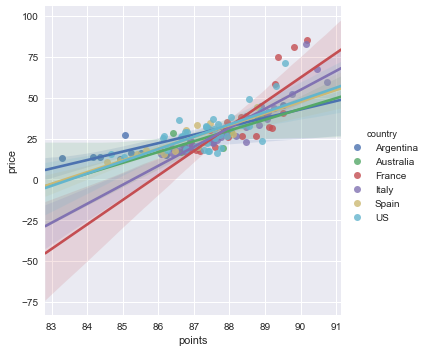

In [13]:
sns.lmplot(x = 'points', y = 'price', data = df_c_v_reduced, hue = 'country')